Exercício 6: Completa as implementações dos modelos RidgeRegression e LogisticRegression

6.1) Adiciona aos modelos anteriores o atributo (parâmetro estimado) cost_history.

- O cost_history deve ser um dicionário.

- Durante as iterações do Gradient Descent, computa a função de custo (self.cost(dataset)) e armazena o resultado no dicionário cost_history.

- A chave deve ser o número da iteração e o valor deve ser o custo nessa iteração.

6.2) Realiza um gráfico (line plot) que permita visualizar o comportamento do custo em função do número de iterações.

- O eixo Y deve conter o valor de custo enquanto o eixo X deve conter as iterações. Podes usar o dicionário cost_history.

- Usa o dataset cpu.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo RidgeRegression.

- Usa o dataset breast-bin.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo LogisticRegression.

6.3) Altera agora o algoritmo de Gradient Descent. Este algoritmo deve parar quando o valor da função de custo (J/self.cost) não se altera.

- Quando a diferença entre o custo da iteração anterior e o custo da iteração atual for inferior a um determinado valor deves parar o Gradient Descent.

- No caso do RidgeRegression, o critério de paragem deve ser uma diferença inferior a 1.

- No caso do LogisticRegression, o critério de paragem deve ser uma diferença inferior a 0.0001.

- Deves usar o dicionário cost_history para obteres o custo da iteração anterior e calcular a diferença da seguinte forma: cost_history(i-1) – cost_history(i).

- Usa o dataset cpu.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo RidgeRegression

- Usa o dataset breast-bin.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo LogisticRegression

RidgeRegression

In [12]:
import matplotlib.pyplot as plt
from si.io.csv import read_csv
from si.io.data_file import read_data_file
from sklearn.preprocessing import StandardScaler
from si.model_selection.split import train_test_split
from si.linear_module.ridge_regression import RidgeRegression
from si.linear_module.logistic_regression import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [13]:
# Load the csv file to the notebook
path = 'C:/Users/Catarina Ferreira/Desktop/Bioinf 2ºano/sistemas_inteligentes/datasets/cpu.csv'
# Reading the csv file
cpu = read_csv(path, sep = ",", features = True, label = True)

In [14]:
# Standardizing and transforming the values
cpu.x = StandardScaler().fit_transform(cpu.x)
# Spliting the dataset in train and testing parts
train, test = train_test_split(cpu)

ridge = RidgeRegression(use_adaptive_alpha = False, max_iter=3000)
# Fits the model keeping without the adaptive alpha
ridge.fit(train)

# Printing the predicted values of the test
print("Test predicted values:\n", ridge.predict(test))
print('--------------------')
# Printing the mean square error (mse)
scores = ridge.score(test)
print("Score:", scores*100)
print('--------------------')
# Printing the cost of the model 
print("Cost:", ridge.cost(test))
# Printing all the costs for each iteration
print('--------------------')
#print("History:\n", ridge.cost_history, '\n')

Test predicted values:
 [ 55.8090555  -28.00226602  99.80013564 291.77158456  71.10619516
 -37.95572122  56.43714396 -47.91344764 210.88711161 171.75585403
  15.0809253  531.77468903  39.88831742 215.09351088 377.86640622
  -1.05972235  23.00705268 -19.37584939 -36.07399985  -8.81922542
 -38.26933526  71.38314868 408.58201802  19.63140657  14.36502953
  72.3819312   -6.53981519 -44.91165882 -32.85869827  35.66629225
  53.64111334  33.58668767  14.48864088  89.82342767 107.49928661
 102.30302463 -29.26140409  28.84953108 -12.79496148  88.04493785
 209.05971451  97.42406648 -41.55378581  29.91407477 171.5431136
  11.42679541  88.04493785  33.84284438  97.8230044  -47.21714642
 -22.59269627  -8.7549551  127.40690261 485.53978932 558.67737065
   4.22154335 -24.39641939  17.82863466  61.73006069 -21.59315401
 278.68062308 -41.27112409]
--------------------
Score: 106107.21255560424
--------------------
Cost: 1122.9476291897356
--------------------


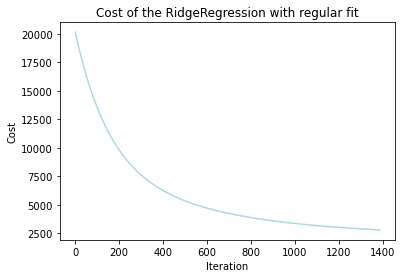

In [15]:
# Ploting the ridge regression with regular fit
plt.plot(list(ridge.cost_history.keys()), list(ridge.cost_history.values()), "-", color = "lightblue")
plt.title("Cost of the RidgeRegression with regular fit")
# Naming the x and y axis
plt.xlabel("Iteration")
plt.ylabel("Cost")
# Showing the plot
plt.show()

In [16]:
ridge_adapt = RidgeRegression(use_adaptive_alpha = True, max_iter=3000)
# Fits the model keeping in mind the adapatitive alpha used
ridge_adapt.fit(train)

# Printing the predicted values of the test
print("Test predicted values:\n", ridge_adapt.predict(test))
print('--------------------')
# Printing the mean square error (mse)
scores = ridge_adapt.score(test)
print("Score:", scores*100)
print('--------------------')
# Printing the cost of the model 
print("Cost:", ridge_adapt.cost(test))
# Printing all the costs for each iteration
print('--------------------')
#print("History:\n", ridge_adapt.cost_history, '\n')

Test predicted values:
 [ 55.82823035 -27.97948359  99.81250588 291.81529242  71.12942403
 -37.93279631  56.46818961 -47.85190419 210.93226755 171.78615273
  15.10033571 531.81976106  39.91580071 215.12057306 377.92595761
  -1.04231575  23.02540491 -19.3606909  -36.06304533  -8.80595496
 -38.25073812  71.4107184  408.63335982  19.65459394  14.38616581
  72.40724729  -6.5244536  -44.87261014 -32.84371255  35.68199883
  53.66645975  33.60241237  14.51086566  89.84727723 107.52680348
 102.32439484 -29.24339306  28.872307   -12.7811009   88.06664993
 209.09695229  97.44531652 -41.52240898  29.9352214  171.573982
  11.44486391  88.06664993  33.86548942  97.84458712 -47.1770515
 -22.56813934  -8.73719992 127.41582017 485.53177215 558.75458946
   4.23778388 -24.35302655  17.84698078  61.75652847 -21.54988621
 278.71902458 -41.23003217]
--------------------
Score: 106034.04495378732
--------------------
Cost: 1122.228871264131
--------------------


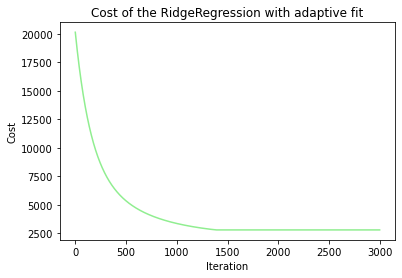

In [17]:
# Ploting the ridge regression with adaptive fit
plt.plot(list(ridge_adapt.cost_history.keys()), list(ridge_adapt.cost_history.values()), "-", color = "lightgreen")
plt.title("Cost of the RidgeRegression with adaptive fit")
# Naming the x and y axis
plt.xlabel("Iteration")
plt.ylabel("Cost")
# Showing the plot
plt.show()

LogisticRgression

In [18]:
# load the csv file to the notebook
path = 'C:/Users/Catarina Ferreira/Desktop/Bioinf 2ºano/sistemas_inteligentes/datasets/breast-bin.data'
# Reading the csv file
breast = read_data_file(path, sep = ",", label = True)

In [19]:
# Standardizing and transforming the values
breast.x = StandardScaler().fit_transform(breast.x)
# Spliting the dataset in train and testing parts
train, test = train_test_split(breast)

linear = LogisticRegression(use_adaptive_alpha = False, max_iter=3000)
# Fits the model without the adaptive alpha
linear.fit(train)

# Printing the predicted values of the test
print("Teste predicted values:\n", linear.predict(test))
print('--------------------')
# Printing accuracy of the model 
scores = linear.score(test)
print("Score:", scores*100)
print('--------------------')
# Printing the cost of the model 
print("Cost:", linear.cost(test))
print('--------------------')
# Printing all the costs for each iteration
#print("History:\n", linear.cost_history)

Teste predicted values:
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
--------------------
Score: 96.17224880382776
--------------------
Cost: 0.13687146898953695
--------------------


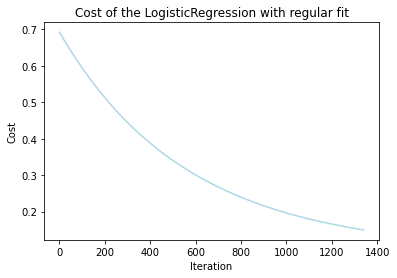

In [20]:
# Ploting the linear regression with regular fit
plt.plot(list(linear.cost_history.keys()), list(linear.cost_history.values()), "-", color = "lightblue")
plt.title("Cost of the LogisticRegression with regular fit")
# Naming the x and y axis
plt.xlabel("Iteration")
plt.ylabel("Cost")
# Showing the plot
plt.show()

In [21]:
linear_adapt = LogisticRegression(use_adaptive_alpha = True, max_iter = 3000)
# Fits the model keeping in mind the adapatitive alpha used
linear_adapt.fit(train)

# Printing the predicted values of the test
print("Teste predicted values:\n", linear_adapt.predict(test))
print('--------------------')
# Printing accuracy of the model 
scores = linear_adapt.score(test)
print("Score:", scores*100)
print('--------------------')
# Printing the cost of the model 
print("Cost:", linear_adapt.cost(test))
print('--------------------')
# Printing all the costs for each iteration
#print("History:\n", linear_adapt.cost_history)

Teste predicted values:
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
--------------------
Score: 96.17224880382776
--------------------
Cost: 0.13678360875241494
--------------------


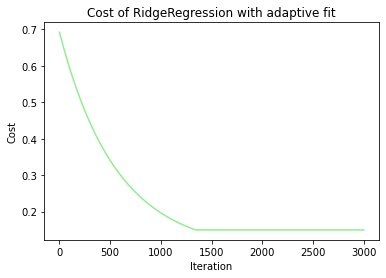

In [22]:
# Ploting the linear regression with adaptive fit
plt.plot(list(linear_adapt.cost_history.keys()), list(linear_adapt.cost_history.values()), "-", color = "lightgreen")
plt.title("Cost of RidgeRegression with adaptive fit")
# Naming the x and y axis
plt.xlabel("Iteration")
plt.ylabel("Cost")
# Showing the plot
plt.show()